In [2]:
%pip install plotly
%pip install wbdata
%pip install cufflinks
%pip install eep153_tools
!pip install wbdata

Note: you may need to restart the kernel to use updated packages.
  Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
  Using cached dateparser-1.2.0-py2.py3-none-any.whl (294 kB)
  Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9
Note: you may need to restart the kernel to use updated packages.
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Note: you may 

In [3]:
import wbdata
import numpy as np
import pandas as pd
import cufflinks as cf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
cf.go_offline()

Key '-1469230142578216706' not in persistent cache.
Key '-1135795277278835961' not in persistent cache.
Key '45028301161063177' not in persistent cache.
Key '3868726154273750952' not in persistent cache.
Key '6695598358380240125' not in persistent cache.
Key '4384382616047715288' not in persistent cache.
Key '8338858622044411845' not in persistent cache.
Key '2455093866398324674' not in persistent cache.
Key '-3470952111875986748' not in persistent cache.
Key '-5059009504696811131' not in persistent cache.
Key '9124930053172851533' not in persistent cache.
Key '3908145863477962998' not in persistent cache.
Key '6037218937120337907' not in persistent cache.
Key '8639105102258001386' not in persistent cache.
Key '4697208402157613625' not in persistent cache.
Key '-3201109266954055524' not in persistent cache.
Key '3369782762596376624' not in persistent cache.
Key '-4786924567290042183' not in persistent cache.
Key '-6871035782031114788' not in persistent cache.
Key '752457650575671738' n

In [4]:
def population(year, sex, age_range, place):

    age_low = age_range[0]
    age_high = age_range[1]
    age_ranges = []
    if age_high > 80:
        for i in range(age_low, 80, 5):
            age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
        age_ranges.append("80UP")
    else:
        # if age_high % 5 == 0:
        for i in range(age_low, age_high, 5):
            age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    
    if sex == "male":
        variables = {"SP.POP." + age_range + ".MA" : "Total Population in Mexico for " + sex + " from " + str(age_low) + " to " + str(age_high) for age_range in age_ranges}
    elif sex == "female":
        variables = {"SP.POP." + age_range + ".FE" : "Total Population in Mexico for " + sex + " from " + str(age_low) + " to " + str(age_high) for age_range in age_ranges}
        
    df = wbdata.get_dataframe(variables, country = place)
    df = df.filter(like = str(year), axis = 0)
    return df
population(year=2000,sex='male',age_range=(45,49),place='MEX')

,Total Population in Mexico for male from 45 to 49
date,
2000,2053328.0


In [5]:
SOURCE = 40
indicators = wbdata.get_indicators(source=SOURCE)

def population_df(region, year = 0): 
    age_ranges = []
    for i in range(0,80,5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    age_ranges.append("80UP")
    
    male = {"SP.POP." + age_range + ".MA" : "Males " + age_range for age_range in age_ranges}
    female = {"SP.POP." + age_range + ".FE" : "Females " + age_range for age_range in age_ranges}
    vars = male
    vars.update(female)
    df = wbdata.get_dataframe(vars, country = region)
    if year == 0:
        df = df.filter(like = str(year), axis = 0)
    return df
population_df("MEX")

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,Males 2529,Males 3034,Males 3539,Males 4044,Males 4549,...,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
2022,4909540.0,5404251.0,5543586.0,5473400.0,5306467.0,5053265.0,4759949.0,4439380.0,4160244.0,3846711.0,...,4770888.0,4519547.0,4210225.0,3780532.0,3224218.0,2642953.0,2069875.0,1494044.0,1012926.0,1270201.0
2021,5021850.0,5469752.0,5552472.0,5491354.0,5288742.0,5034615.0,4703971.0,4392392.0,4125414.0,3795837.0,...,4730818.0,4478614.0,4148548.0,3693201.0,3130320.0,2560331.0,1992404.0,1426861.0,979184.0,1251228.0
2020,5130814.0,5513795.0,5552581.0,5503565.0,5268415.0,5004444.0,4650765.0,4350543.0,4097783.0,3749726.0,...,4689970.0,4439117.0,4086609.0,3607029.0,3044982.0,2487451.0,1923411.0,1371823.0,957069.0,1243489.0
2019,5234315.0,5544252.0,5553127.0,5503890.0,5249081.0,4960161.0,4597843.0,4311790.0,4060108.0,3694174.0,...,4649315.0,4391743.0,4017866.0,3516451.0,2957521.0,2406819.0,1847178.0,1318334.0,934000.0,1233595.0
2018,5340893.0,5571904.0,5570109.0,5505324.0,5247894.0,4927590.0,4549561.0,4268011.0,4003393.0,3620198.0,...,4610967.0,4336157.0,3938647.0,3418264.0,2864366.0,2313846.0,1760010.0,1263449.0,907385.0,1205594.0
2017,5431847.0,5594835.0,5599881.0,5503223.0,5255523.0,4899489.0,4503652.0,4214030.0,3939665.0,3535111.0,...,4568816.0,4277053.0,3850548.0,3319518.0,2769813.0,2217083.0,1672430.0,1210754.0,882306.0,1160644.0
2016,5502230.0,5607660.0,5626889.0,5483468.0,5250525.0,4850257.0,4449348.0,4162676.0,3880011.0,3445250.0,...,4522745.0,4214424.0,3754877.0,3223349.0,2674564.0,2120540.0,1589738.0,1163301.0,858255.0,1113529.0
2015,5563028.0,5622810.0,5659481.0,5467541.0,5238610.0,4792102.0,4383546.0,4110288.0,3816253.0,3352132.0,...,4475238.0,4146201.0,3656032.0,3127161.0,2575395.0,2025698.0,1512273.0,1122093.0,832879.0,1064566.0
2014,5614204.0,5647817.0,5688527.0,5469454.0,5216582.0,4727212.0,4314278.0,4051310.0,3744559.0,3258873.0,...,4423543.0,4068962.0,3558076.0,3029668.0,2470926.0,1932240.0,1443232.0,1086720.0,804879.0,1016042.0


In [6]:
import re
def dataframes(indicators):
    """
    Parameters:
    - indicators (list): A list of dictionaries where each dictionary contains 'id' and 'name' for World Bank indicators.
    
    Returns:
    - pandas.DataFrame: DataFrame containing the requested data for Mexico, indexed by Year.
    """
    # Initialize a dictionary to store the IDs and names of the indicators
    labels = {indicator['id']: indicator['name'] for indicator in indicators}

    def find_labels():
        """
        Filters through given indicators to select relevant population data IDs for Mexico.
        
        Returns:
        - dict: A dictionary with filtered indicator IDs as keys and their names as values.
        """
        # Regex to match relevant population indicators
        r = re.compile("SP\.POP\.[\d]{2}[A-Z0-9]{2}\.[MAFE]{2}$")
        
        # Filter indicators based on regex
        col_keys = [key for key in labels if r.match(key)]
        
        # Ensure total population is included
        col_keys.append('SP.POP.TOTL')
        
        # Filter and prepare the labels dictionary
        labels_filtered = {key: labels[key] for key in col_keys}
        
        return labels_filtered

    # Get filtered labels based on the defined criteria
    df_labels = find_labels()
    
    # Fetch data for the filtered labels, specifically for Mexico
    mexico_df = wbdata.get_dataframe(df_labels, country=["MEX"])

    return mexico_df

In [7]:
pop_df = dataframes(indicators)
pop_df.head()

,"Population ages 00-04, female","Population ages 00-04, male","Population ages 05-09, female","Population ages 05-09, male","Population ages 10-14, female","Population ages 10-14, male","Population ages 15-19, female","Population ages 15-19, male","Population ages 20-24, female","Population ages 20-24, male",...,"Population ages 60-64, male","Population ages 65-69, female","Population ages 65-69, male","Population ages 70-74, female","Population ages 70-74, male","Population ages 75-79, female","Population ages 75-79, male","Population ages 80 and above, female","Population ages 80 and above, male","Population, total"
date,,,,,,,,,,,,,,,,,,,,,
2022,4754418.0,4909540.0,5255176.0,5404251.0,5380585.0,5543586.0,5362950.0,5473400.0,5316219.0,5306467.0,...,2280012.0,2069875.0,1763505.0,1494044.0,1256578.0,1012926.0,829925.0,1270201.0,915290.0,127504125.0
2021,4870663.0,5021850.0,5313799.0,5469752.0,5388369.0,5552472.0,5380860.0,5491354.0,5311017.0,5288742.0,...,2222254.0,1992404.0,1713969.0,1426861.0,1213263.0,979184.0,812561.0,1251228.0,916267.0,126705138.0
2020,4984496.0,5130814.0,5351703.0,5513795.0,5390553.0,5552581.0,5396092.0,5503565.0,5305178.0,5268415.0,...,2181409.0,1923411.0,1678743.0,1371823.0,1187192.0,957069.0,809639.0,1243489.0,935257.0,125998302.0
2019,5092685.0,5234315.0,5376086.0,5544252.0,5393899.0,5553127.0,5404286.0,5503890.0,5302012.0,5249081.0,...,2125744.0,1847178.0,1628639.0,1318334.0,1154658.0,934000.0,798924.0,1233595.0,943780.0,125085311.0
2018,5192561.0,5340893.0,5398350.0,5571904.0,5411317.0,5570109.0,5412989.0,5505324.0,5308658.0,5247894.0,...,2052190.0,1760010.0,1559795.0,1263449.0,1111535.0,907385.0,776696.0,1205594.0,925170.0,124013861.0


In [8]:
# Check for Missing Values
# Check for any missing values in the DataFrame
missing_values = pop_df.isnull().sum()
missing_values

# Remove spaces, and standardize naming if necessary
pop_df.columns = pop_df.columns.str.replace(' ', '_').str.lower()

pop_df_reversed = pop_df.iloc[::-1]

In [9]:
# Data frame containing growth rates per year for every population
# Calculate the year-over-year growth rate for each column as before
growth_df = pop_df_reversed.pct_change()

# Convert the growth rate to percentage format
growth_df = growth_df * 100

# Rename columns to indicate these are growth rates
growth_df.columns = ['Growth Rate (%) - ' + col.replace('_', ' ').title() for col in growth_df.columns]

# Resetting the index to make 'date' a column if it's not already, for better table formatting
growth_df.reset_index(inplace=True)

# Optionally, format the DataFrame for presentation (e.g., rounding)
growth_df = growth_df.round(2)  # Round to two decimal places for clarity

# Display the formatted DataFrame
growth_df.tail()  # Display the first few rows to check the format

,date,"Growth Rate (%) - Population Ages 00-04, Female","Growth Rate (%) - Population Ages 00-04, Male","Growth Rate (%) - Population Ages 05-09, Female","Growth Rate (%) - Population Ages 05-09, Male","Growth Rate (%) - Population Ages 10-14, Female","Growth Rate (%) - Population Ages 10-14, Male","Growth Rate (%) - Population Ages 15-19, Female","Growth Rate (%) - Population Ages 15-19, Male","Growth Rate (%) - Population Ages 20-24, Female",...,"Growth Rate (%) - Population Ages 60-64, Male","Growth Rate (%) - Population Ages 65-69, Female","Growth Rate (%) - Population Ages 65-69, Male","Growth Rate (%) - Population Ages 70-74, Female","Growth Rate (%) - Population Ages 70-74, Male","Growth Rate (%) - Population Ages 75-79, Female","Growth Rate (%) - Population Ages 75-79, Male","Growth Rate (%) - Population Ages 80 And Above, Female","Growth Rate (%) - Population Ages 80 And Above, Male","Growth Rate (%) - Population, Total"
58,2018,-1.46,-1.67,-0.35,-0.41,-0.54,-0.53,-0.07,0.04,-0.22,...,3.95,5.24,4.88,4.35,4.24,2.84,3.26,3.87,4.12,0.96
59,2019,-1.92,-2.00,-0.41,-0.50,-0.32,-0.30,-0.16,-0.03,-0.13,...,3.58,4.95,4.41,4.34,3.88,2.93,2.86,2.32,2.01,0.86
60,2020,-2.12,-1.98,-0.45,-0.55,-0.06,-0.01,-0.15,-0.01,0.06,...,2.62,4.13,3.08,4.06,2.82,2.47,1.34,0.80,-0.90,0.73
61,2021,-2.28,-2.12,-0.71,-0.80,-0.04,-0.00,-0.28,-0.22,0.11,...,1.87,3.59,2.10,4.01,2.20,2.31,0.36,0.62,-2.03,0.56
62,2022,-2.39,-2.24,-1.10,-1.20,-0.14,-0.16,-0.33,-0.33,0.10,...,2.60,3.89,2.89,4.71,3.57,3.45,2.14,1.52,-0.11,0.63


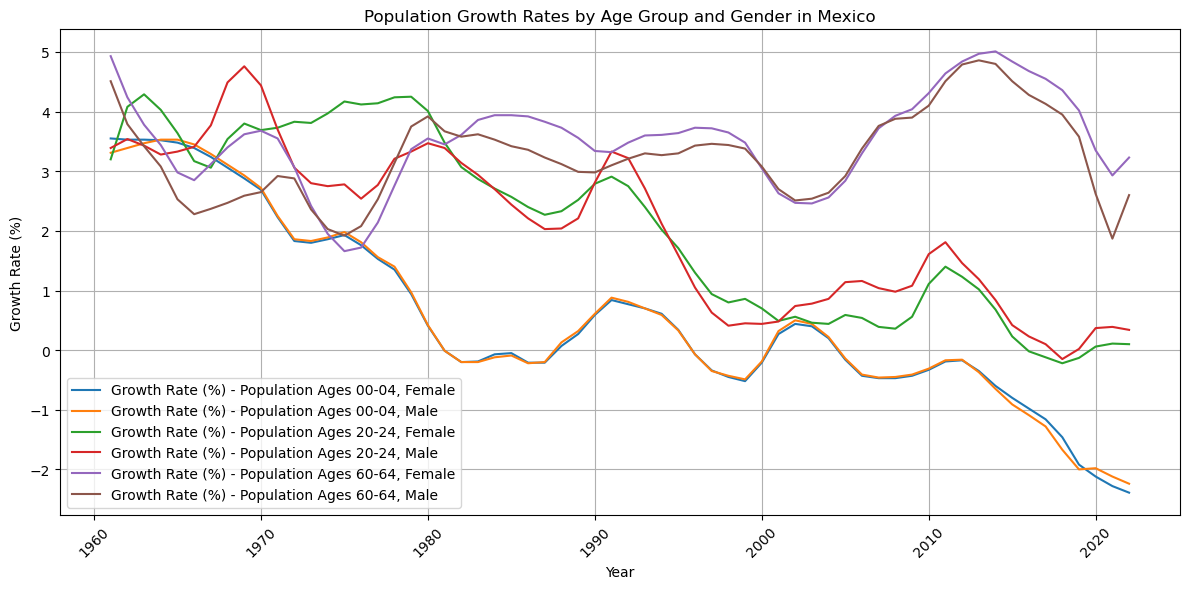

In [10]:
# Graph Pop Growth Rates for Every Age Group
# Convert 'date' from string to datetime to ensure proper plotting
growth_df['date'] = pd.to_datetime(growth_df['date'])

# Select a subset of columns to plot for clarity, for example, ages 00-04 and 20-24 for both genders
columns_to_plot = [
    'Growth Rate (%) - Population Ages 00-04, Female',
    'Growth Rate (%) - Population Ages 00-04, Male',
    'Growth Rate (%) - Population Ages 20-24, Female',
    'Growth Rate (%) - Population Ages 20-24, Male',
    'Growth Rate (%) - Population Ages 60-64, Female',
    'Growth Rate (%) - Population Ages 60-64, Male'
]

# Plotting
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(growth_df['date'], growth_df[column], label=column)

# Formatting the plot
plt.title('Population Growth Rates by Age Group and Gender in Mexico')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

# Display the plot
plt.show()

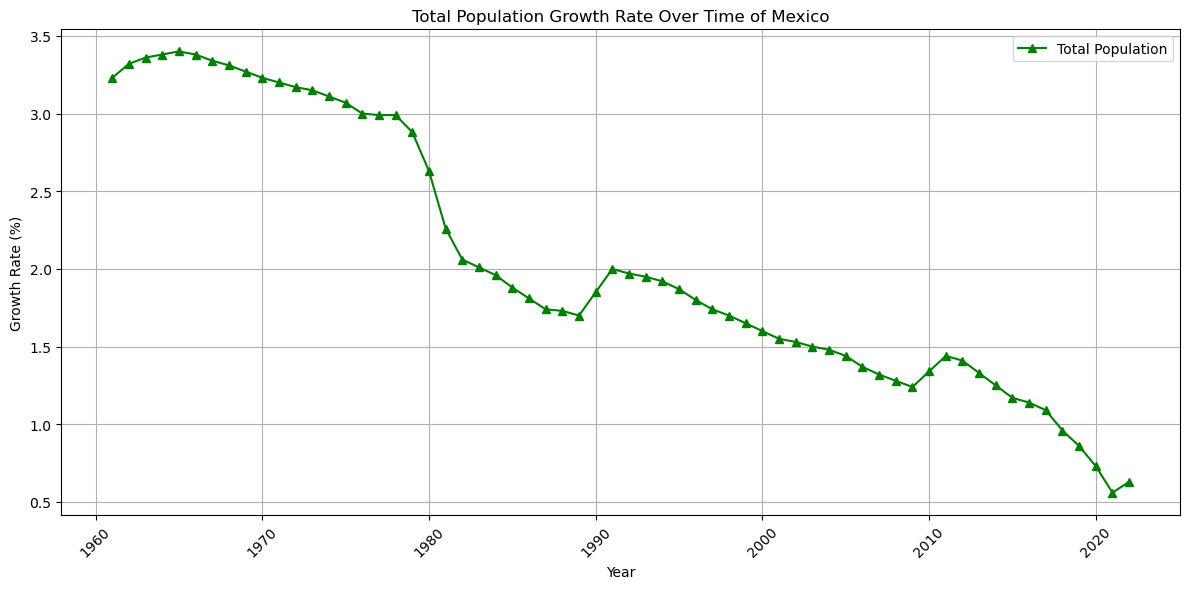

In [11]:
plt.figure(figsize=(12, 6))

# Plotting total population growth rate
plt.plot(growth_df['date'], growth_df['Growth Rate (%) - Population, Total'], label='Total Population', color='green', marker='^')

# Formatting the plot
plt.title('Total Population Growth Rate Over Time of Mexico')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

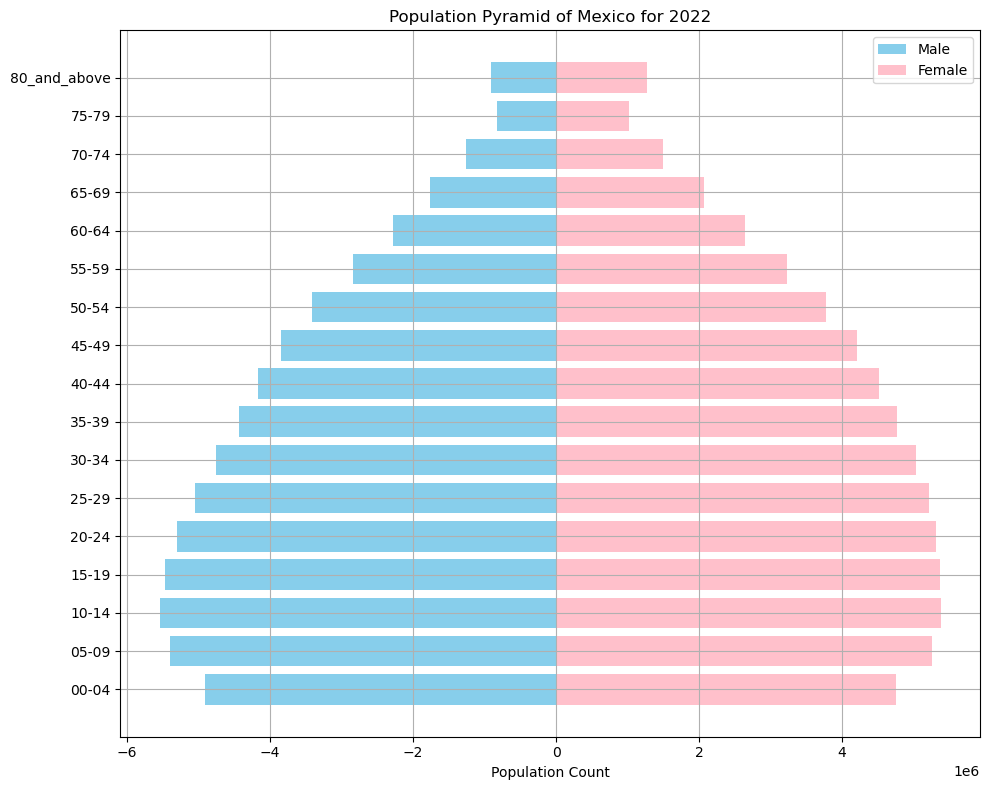

In [12]:
# Assuming pop_df is your DataFrame and its index represents the year

# Select the most recent year's data from the DataFrame
most_recent_year = pop_df.index.max()
year_data = pop_df.loc[most_recent_year]

# Extract male and female population counts for each age group
# Age groups based on provided structure; adjust as necessary
age_groups = ['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80_and_above']
male_population = [-year_data[f'population_ages_{age},_male'] for age in age_groups]
female_population = [year_data[f'population_ages_{age},_female'] for age in age_groups]

# Create the population pyramid plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting male population on the left by using negative values
ax.barh(age_groups, male_population, color='skyblue', label='Male')
# Plotting female population on the right
ax.barh(age_groups, female_population, color='pink', label='Female')

# Adding labels and title
ax.set_xlabel('Population Count')
ax.set_title(f'Population Pyramid of Mexico for {most_recent_year}')
ax.legend()

# Adding grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
def econ_dataframes(indicators):
    """
    Parameters:
    - indicators (list): A list of dictionaries where each dictionary contains 'id' and 'name' for World Bank indicators.
    
    Returns:
    - pandas.DataFrame: DataFrame containing the requested data for Mexico, indexed by Year.
    """
    # Initialize a dictionary to store the IDs and names of the indicators
    df_labels = {"NYGDPMKTPSACD" : "GDP"}
    print(df_labels)
    
    # Fetch data for the filtered labels, specifically for Mexico
    mexico_df = wbdata.get_dataframe(df_labels, country=["MEX"])

    return mexico_df

# Economic indicators
econ_indicators = wbdata.get_indicators(source=15)
gdp_df = econ_dataframes(indicators)
gdp_df.head()

{'NYGDPMKTPSACD': 'GDP'}


,GDP
date,
2023,8.544120e+05
2022,1.467370e+06
2021,1.313282e+06
2020,1.127612e+06
2019,1.306215e+06


In [14]:
# Check for Missing Values
# Check for any missing values in the DataFrame
missing_values = gdp_df.isnull().sum()
missing_values

# Remove spaces, and standardize naming if necessary
gdp_df.columns = gdp_df.columns.str.replace(' ', '_').str.lower()

gdp_df_reversed = gdp_df.iloc[::-1]

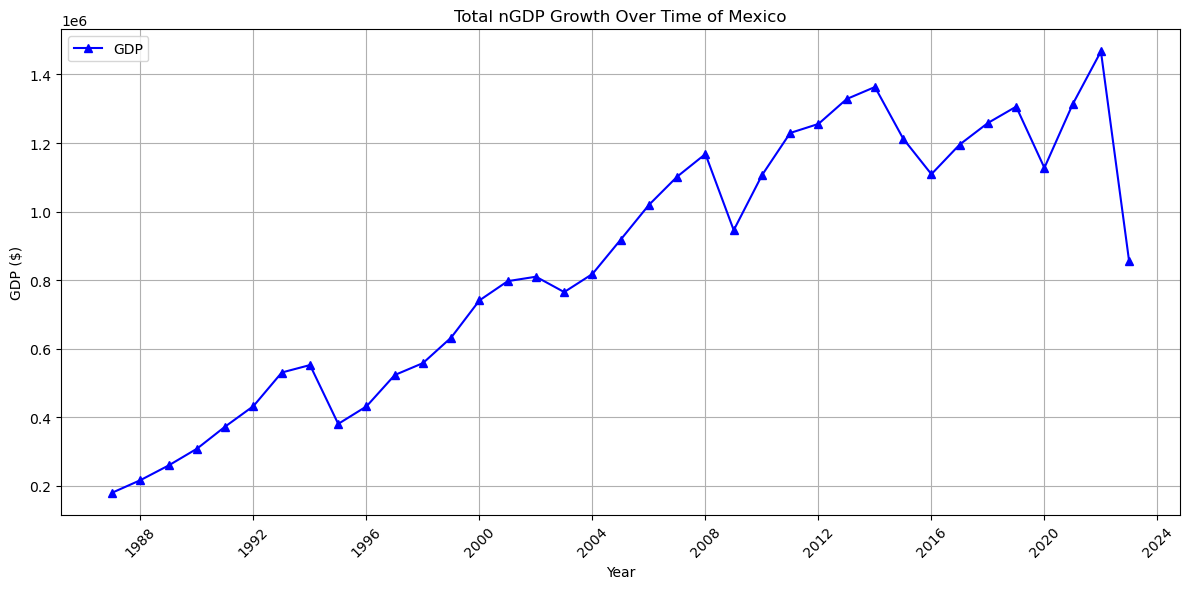

In [15]:
gdp_df = gdp_df.reset_index()
# Graph Changes to GDP
gdp_df['date'] = pd.to_datetime(gdp_df['date'])

plt.figure(figsize=(12, 6))

# Plotting GDP Growth
plt.plot(gdp_df['date'], gdp_df['gdp'], label='GDP', color='blue', marker='^')

# Formatting the plot
plt.title('Total nGDP Growth Over Time of Mexico')
plt.xlabel('Year')
plt.ylabel('GDP ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [16]:
def export_dataframes(indicators):
    """
    Parameters:
    - indicators (list): A list of dictionaries where each dictionary contains 'id' and 'name' for World Bank indicators.
    
    Returns:
    - pandas.DataFrame: DataFrame containing the requested data for Mexico, indexed by Year.
    """
    # Initialize a dictionary to store the IDs and names of the indicators
    df_labels = {"DXGSRMRCHNSKD" : "Exports"}
    print(df_labels)
    
    # Fetch data for the filtered labels, specifically for Mexico
    mexico_df = wbdata.get_dataframe(df_labels, country=["MEX"])
    return mexico_df

# Economic indicators
econ_indicators = wbdata.get_indicators(source=15)
export_df = export_dataframes(indicators)
export_df.head()

{'DXGSRMRCHNSKD': 'Exports'}


,Exports
date,
2023,NaN
2022,517729.016595
2021,478649.179181
2020,447384.156665
2019,470659.682341


In [17]:
# Check for Missing Values
# Check for any missing values in the DataFrame
missing_values = export_df.isnull().sum()
missing_values

# Remove spaces, and standardize naming if necessary
export_df.columns = export_df.columns.str.replace(' ', '_').str.lower()

export_df_reversed = export_df.iloc[::-1]

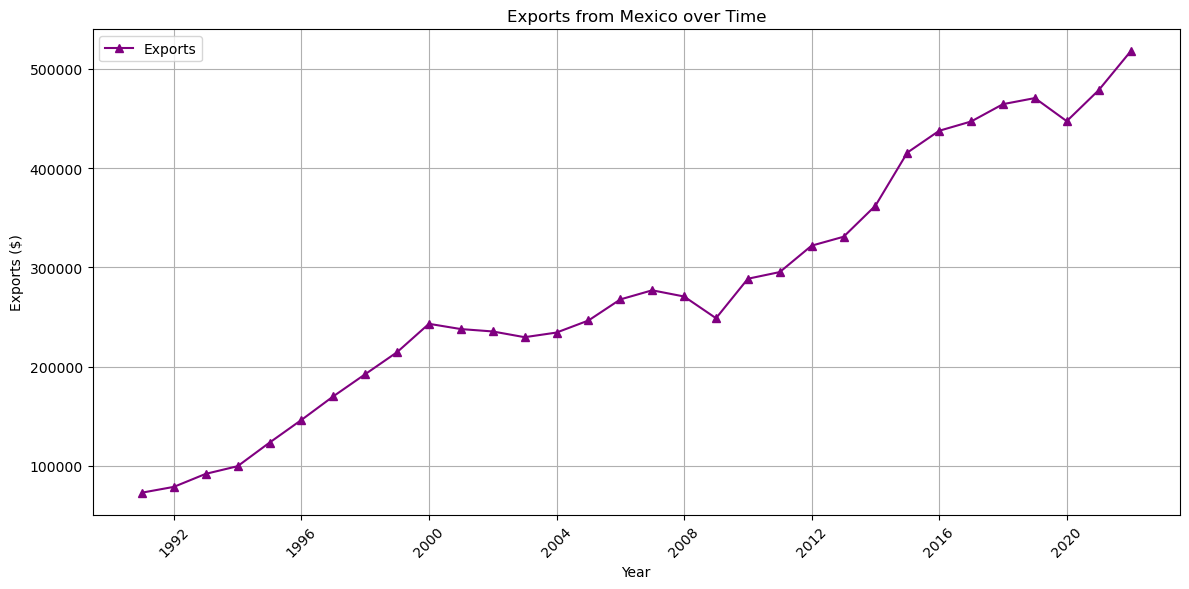

In [18]:
export_df = export_df.reset_index()
# Graph Changes to GDP
export_df['date'] = pd.to_datetime(export_df['date'])

plt.figure(figsize=(12, 6))

# Plotting GDP Growth
plt.plot(export_df['date'], export_df['exports'], label='Exports', color='purple', marker='^')

# Formatting the plot
plt.title('Exports from Mexico over Time')
plt.xlabel('Year')
plt.ylabel('Exports ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [19]:
def life_expectancy_dataframes(indicators):
    """
    Parameters:
    - indicators (list): A list of dictionaries where each dictionary contains 'id' and 'name' for World Bank indicators.
    
    Returns:
    - pandas.DataFrame: DataFrame containing the requested data for Mexico, indexed by Year.
    """
    # Initialize a dictionary to store the IDs and names of the indicators
    df_labels = {"SP.DYN.LE00.IN" : "LifeExpectancy"}
    print(df_labels)
    
    # Fetch data for the filtered labels, specifically for Mexico
    mexico_df = wbdata.get_dataframe(df_labels, country=["MEX"])
    return mexico_df

# Population indicators
econ_indicators = wbdata.get_indicators(source=40)
life_expectancy_df = life_expectancy_dataframes(indicators)
life_expectancy_df.head()

{'SP.DYN.LE00.IN': 'LifeExpectancy'}


,LifeExpectancy
date,
2022,NaN
2021,70.213
2020,70.133
2019,74.202
2018,74.015


In [20]:
# Check for Missing Values
# Check for any missing values in the DataFrame
missing_values = life_expectancy_df.isnull().sum()
missing_values

# Remove spaces, and standardize naming if necessary
life_expectancy_df.columns = life_expectancy_df.columns.str.replace(' ', '_').str.lower()

life_expectancy_df_reversed = life_expectancy_df.iloc[::-1]

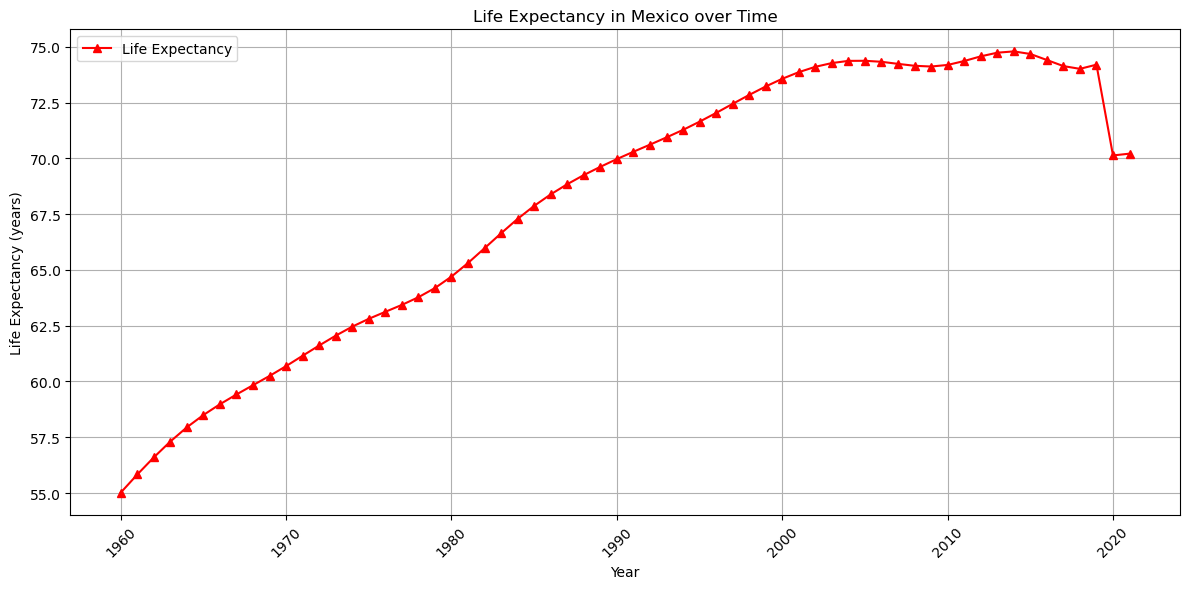

In [21]:
life_expectancy_df = life_expectancy_df.reset_index()
# Graph Changes to GDP
life_expectancy_df['date'] = pd.to_datetime(life_expectancy_df['date'])

plt.figure(figsize=(12, 6))

# Plotting GDP Growth
plt.plot(life_expectancy_df['date'], life_expectancy_df['lifeexpectancy'], label='Life Expectancy', color='red', marker='^')

# Formatting the plot
plt.title('Life Expectancy in Mexico over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [22]:
def poverty_dataframes(indicators):
    """
    Parameters:
    - indicators (list): A list of dictionaries where each dictionary contains 'id' and 'name' for World Bank indicators.
    
    Returns:
    - pandas.DataFrame: DataFrame containing the requested data for Mexico, indexed by Year.
    """
    # Initialize a dictionary to store the IDs and names of the indicators
    df_labels = {"SI.POV.NAHC" : "PovertyHeadcount"}
    print(df_labels)
    
    # Fetch data for the filtered labels, specifically for Mexico
    mexico_df = wbdata.get_dataframe(df_labels, country=["MEX"])
    return mexico_df

# Population indicators
poverty_indicators = wbdata.get_indicators(source=16)
poverty_df = poverty_dataframes(indicators)
poverty_df.head

{'SI.POV.NAHC': 'PovertyHeadcount'}


<bound method NDFrame.head of       PovertyHeadcount
date                  
2022              36.3
2021               NaN
2020              43.9
2019               NaN
2018              41.9
...                ...
1964               NaN
1963               NaN
1962               NaN
1961               NaN
1960               NaN

[63 rows x 1 columns]>

In [23]:
# Check for Missing Values
# Check for any missing values in the DataFrame
missing_values = poverty_df.isnull().sum()
missing_values

# Remove spaces, and standardize naming if necessary
poverty_df.columns = poverty_df.columns.str.replace(' ', '_').str.lower()

poverty_df_reversed = poverty_df.iloc[::-1]

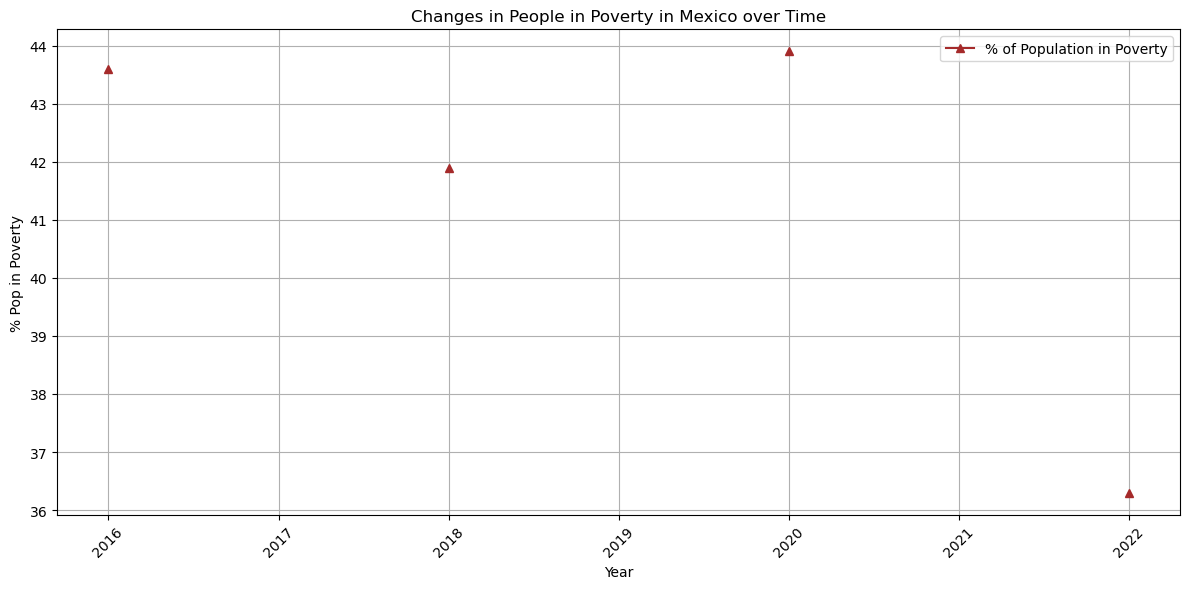

In [24]:
poverty_df = poverty_df.reset_index()
# Graph Changes to GDP
poverty_df['date'] = pd.to_datetime(poverty_df['date'])

plt.figure(figsize=(12, 6))

# Plotting GDP Growth
plt.plot(poverty_df['date'], poverty_df['povertyheadcount'], label='% of Population in Poverty', color='brown', marker='^')

# Formatting the plot
plt.title('Changes in People in Poverty in Mexico over Time')
plt.xlabel('Year')
plt.ylabel('% Pop in Poverty')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [25]:
def get_health_indicators(region):
    # Define the indicators to fetch
    indicators = {
        'SP.DYN.IMRT.FE.IN': 'Mortality rate, infant, female (per 1,000 live births)',
        'SP.DYN.IMRT.IN': 'Mortality rate, infant (per 1,000 live births)',
        'SP.DYN.IMRT.MA.IN': 'Mortality rate, infant, male (per 1,000 live births)',
        'SP.DYN.AMRT.FE': 'Mortality rate, adult, female (per 1,000 female adults)',
        'SP.DYN.AMRT.MA': 'Mortality rate, adult, male (per 1,000 male adults)',
        'SP.DYN.CBRT.IN': 'Birth rate, crude (per 1,000 people)',
        'SP.DYN.CDRT.IN': 'Death rate, crude (per 1,000 people)',
        'SP.DYN.LE00.FE.IN': 'Life expectancy at birth, female (years)',
        'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)',
        'SP.DYN.LE00.MA.IN': 'Life expectancy at birth, male (years)',
        'SP.DYN.TFRT.IN': 'Fertility rate, total (births per woman)'
    }

    # Fetch the data for the specified region
    data_frame = wbdata.get_dataframe(indicators, country=region)
    return data_frame

health_data = get_health_indicators('MEX')
health_data.head()

,"Mortality rate, infant, female (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)","Mortality rate, infant, male (per 1,000 live births)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Life expectancy at birth, female (years)","Life expectancy at birth, total (years)","Life expectancy at birth, male (years)","Fertility rate, total (births per woman)"
date,,,,,,,,,,,
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,10.2,11.4,12.5,130.813,288.394,14.857,9.406,74.864,70.213,66.056,1.822
2020,10.6,11.8,12.9,141.359,283.286,15.565,9.330,74.314,70.133,66.334,1.905
2019,10.9,12.2,13.4,99.114,205.773,15.710,6.931,77.574,74.202,70.931,1.916
2018,11.3,12.6,13.9,101.426,205.793,16.465,6.856,77.286,74.015,70.829,1.996


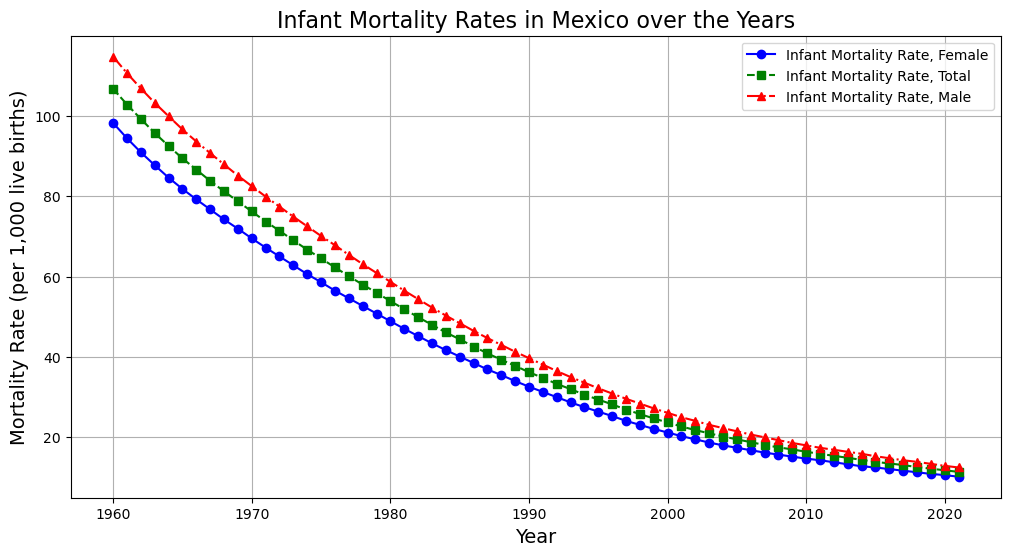

In [26]:
import matplotlib.ticker as ticker

health_data = health_data.iloc[1:]

health_data = health_data.iloc[::-1]

# Plot the selected mortality rates
plt.figure(figsize=(12, 6))

# Plot each mortality rate with a meaningful line style and marker
plt.plot(health_data.index, health_data['Mortality rate, infant, female (per 1,000 live births)'], 
         marker='o', linestyle='-', color='blue', label='Infant Mortality Rate, Female')
plt.plot(health_data.index, health_data['Mortality rate, infant (per 1,000 live births)'], 
         marker='s', linestyle='--', color='green', label='Infant Mortality Rate, Total')
plt.plot(health_data.index, health_data['Mortality rate, infant, male (per 1,000 live births)'], 
         marker='^', linestyle='-.', color='red', label='Infant Mortality Rate, Male')

# Add titles and labels with good aesthetics
plt.title('Infant Mortality Rates in Mexico over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate (per 1,000 live births)', fontsize=14)
plt.legend()
plt.grid(True)

ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Show the plot
plt.show()

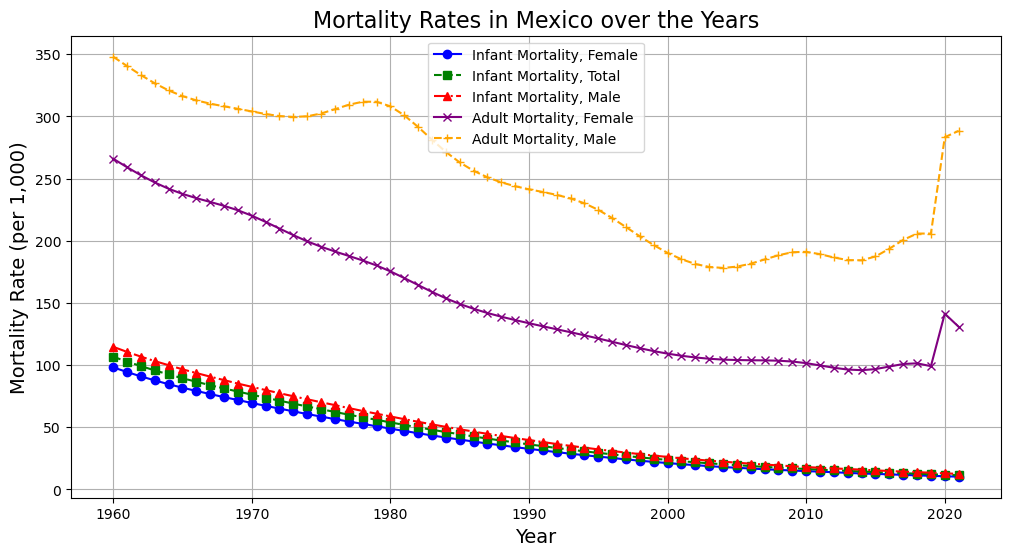

In [27]:
# Plot the selected mortality rates
plt.figure(figsize=(12, 6))

# Plot each mortality rate with a meaningful line style and marker
plt.plot(health_data.index, health_data['Mortality rate, infant, female (per 1,000 live births)'], 
         marker='o', linestyle='-', color='blue', label='Infant Mortality, Female')
plt.plot(health_data.index, health_data['Mortality rate, infant (per 1,000 live births)'], 
         marker='s', linestyle='--', color='green', label='Infant Mortality, Total')
plt.plot(health_data.index, health_data['Mortality rate, infant, male (per 1,000 live births)'], 
         marker='^', linestyle='-.', color='red', label='Infant Mortality, Male')
plt.plot(health_data.index, health_data['Mortality rate, adult, female (per 1,000 female adults)'], 
         marker='x', linestyle='-', color='purple', label='Adult Mortality, Female')
plt.plot(health_data.index, health_data['Mortality rate, adult, male (per 1,000 male adults)'], 
         marker='+', linestyle='--', color='orange', label='Adult Mortality, Male')

# Add titles and labels with good aesthetics
plt.title('Mortality Rates in Mexico over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate (per 1,000)', fontsize=14)
plt.legend()
plt.grid(True)

# Set x-axis major tick interval to every 10 years
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Show the plot
plt.show()

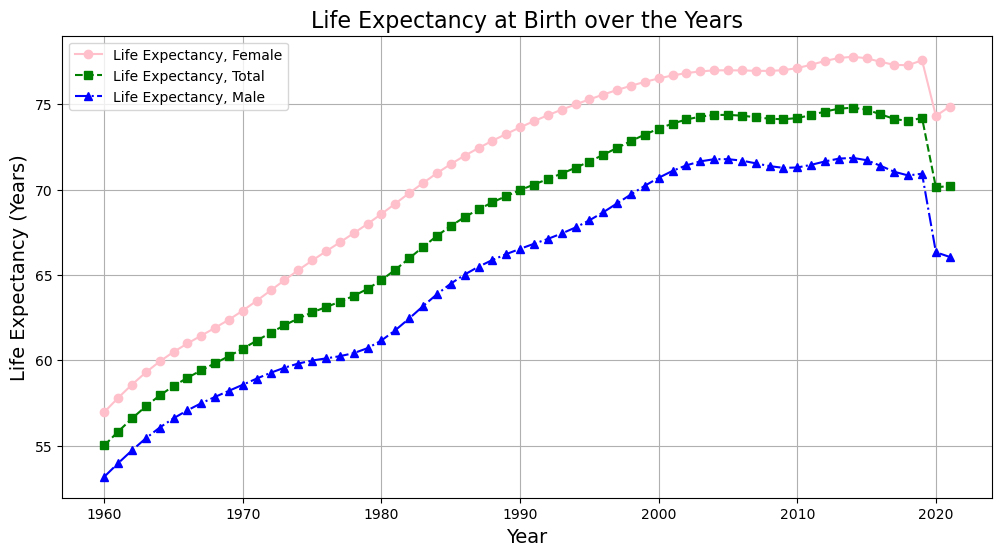

In [28]:
# Plot the life expectancy rates
plt.figure(figsize=(12, 6))

# Plot each life expectancy rate with a meaningful line style and marker
plt.plot(health_data.index, health_data['Life expectancy at birth, female (years)'], 
         marker='o', linestyle='-', color='pink', label='Life Expectancy, Female')
plt.plot(health_data.index, health_data['Life expectancy at birth, total (years)'], 
         marker='s', linestyle='--', color='green', label='Life Expectancy, Total')
plt.plot(health_data.index, health_data['Life expectancy at birth, male (years)'], 
         marker='^', linestyle='-.', color='blue', label='Life Expectancy, Male')

# Add titles and labels with good aesthetics
plt.title('Life Expectancy at Birth over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)
plt.legend()
plt.grid(True)

# Set x-axis major tick interval to every 10 years
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Show the plot
plt.show()

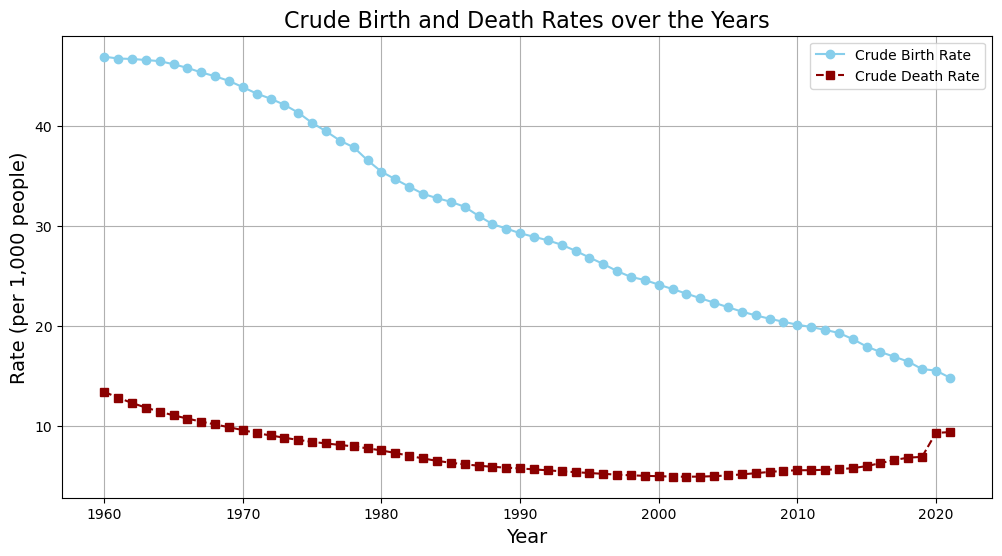

In [29]:
# Plot the crude birth and death rates
plt.figure(figsize=(12, 6))

# Plot each rate with a meaningful line style and marker
plt.plot(health_data.index, health_data['Birth rate, crude (per 1,000 people)'], 
         marker='o', linestyle='-', color='skyblue', label='Crude Birth Rate')
plt.plot(health_data.index, health_data['Death rate, crude (per 1,000 people)'], 
         marker='s', linestyle='--', color='darkred', label='Crude Death Rate')

# Add titles and labels with good aesthetics
plt.title('Crude Birth and Death Rates over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rate (per 1,000 people)', fontsize=14)
plt.legend()
plt.grid(True)

# Set x-axis major tick interval to every 10 years
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Show the plot
plt.show()

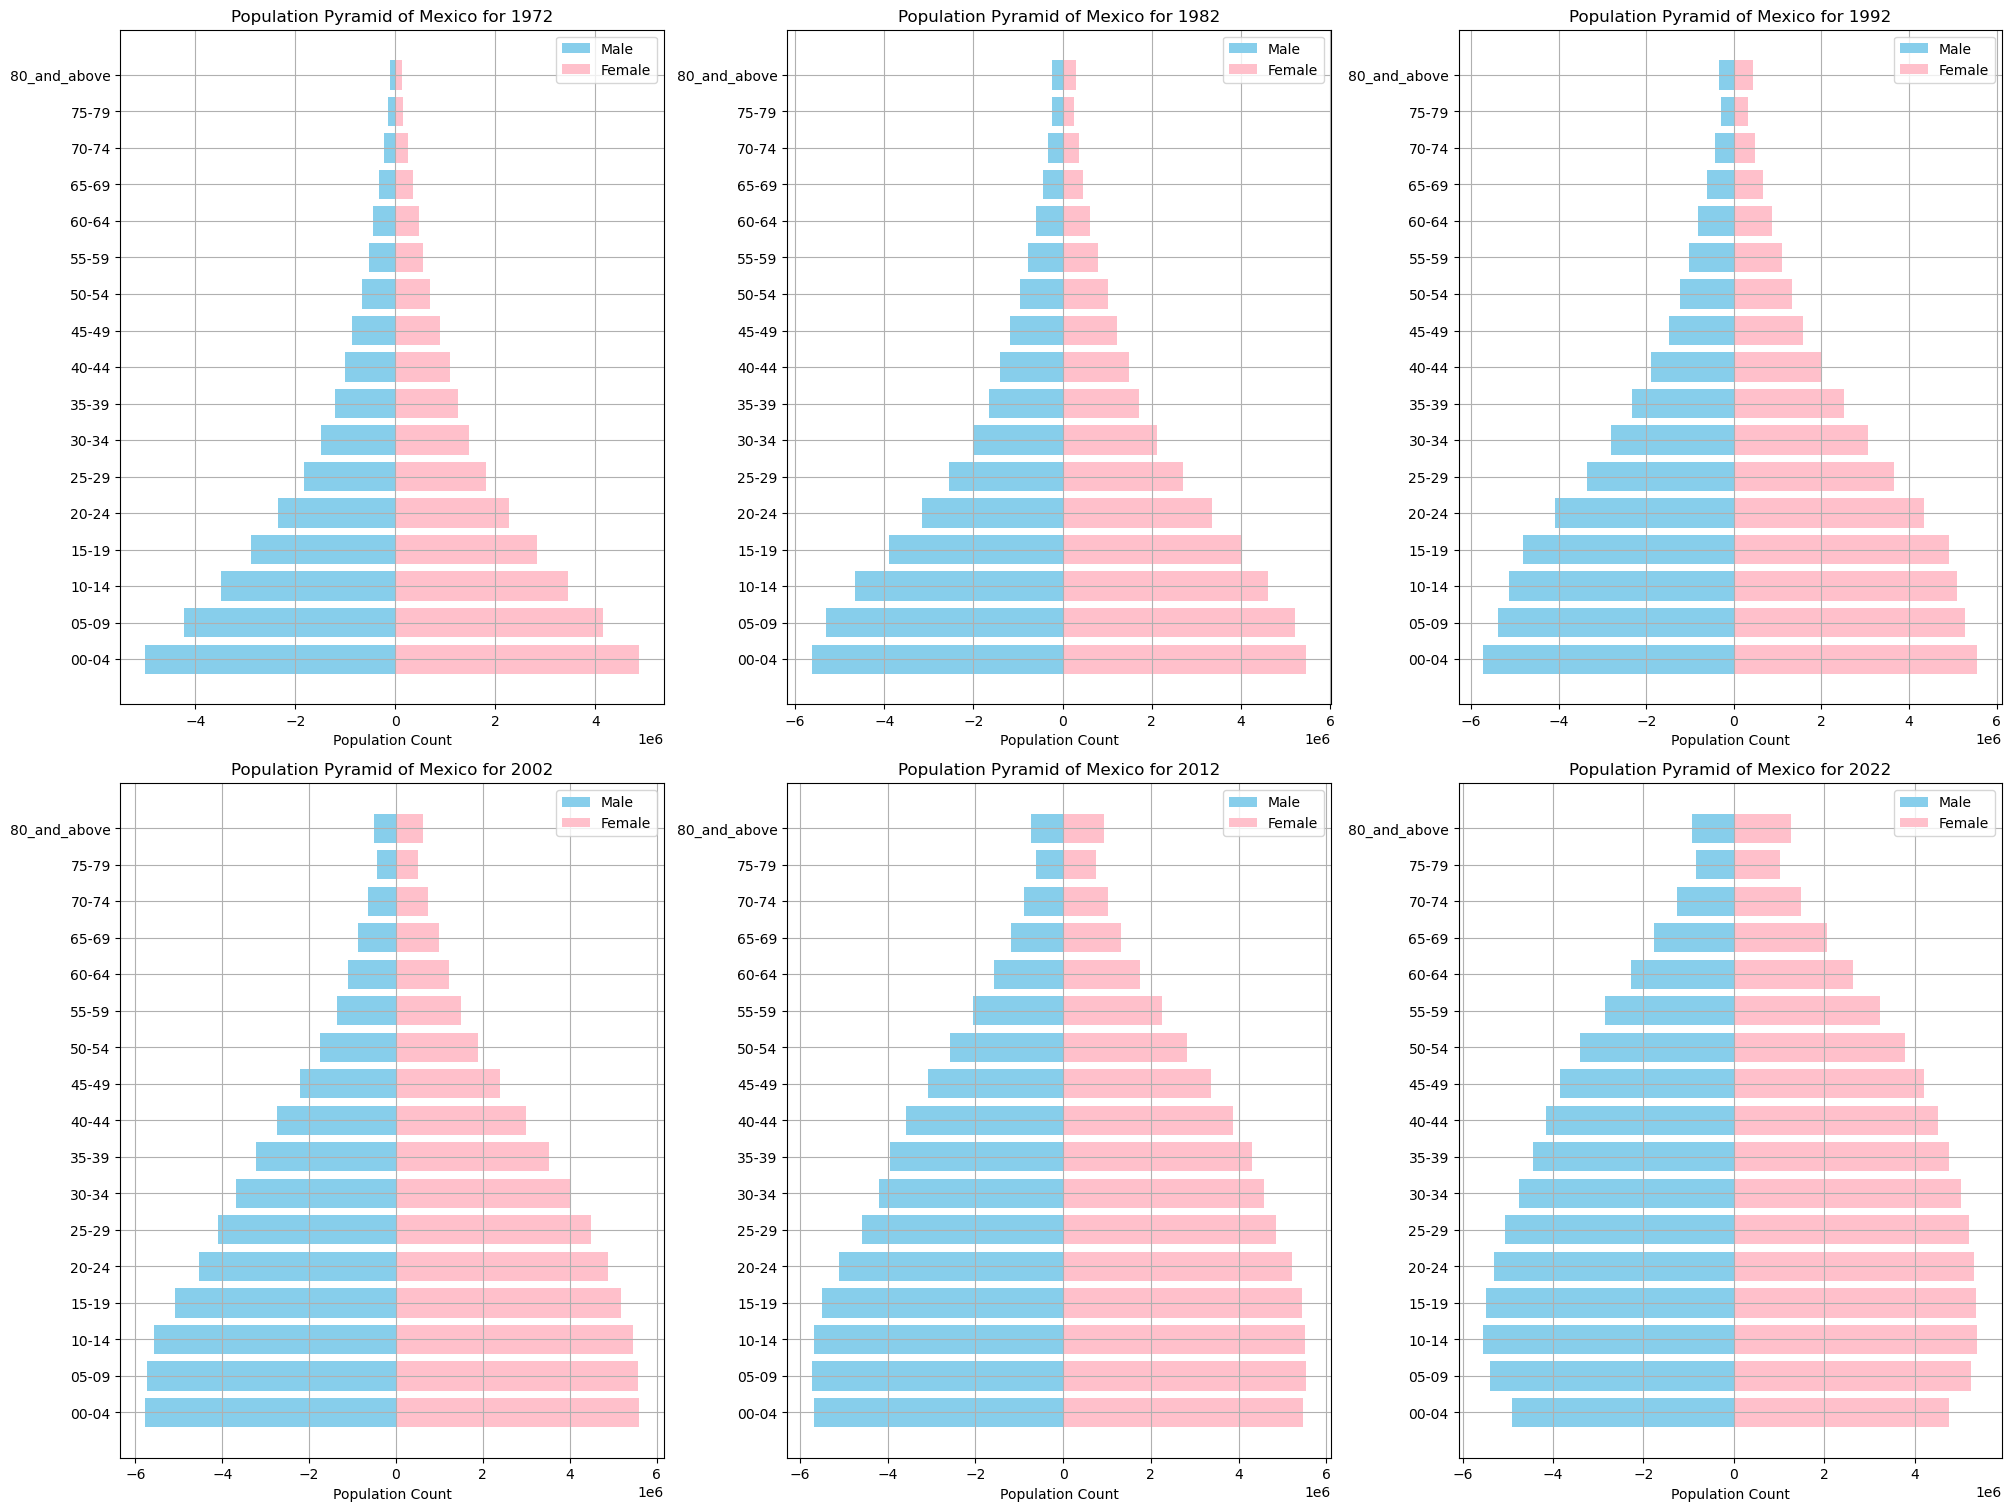

In [30]:
# Example conversion if the DataFrame index is string type
years_to_plot = [1972, 1982, 1992, 2002, 2012, 2022]
age_groups = ['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80_and_above']

# Create the figure and subplots for a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, year in enumerate(years_to_plot):
    # Convert year to string if DataFrame's index is of string type
    str_year = str(year)
    
    # Extract data for the current year, using the converted year as appropriate
    year_data = pop_df.loc[str_year]

    # Extract male and female population counts for each age group
    male_population = [-year_data[f'population_ages_{age},_male'] for age in age_groups]
    female_population = [year_data[f'population_ages_{age},_female'] for age in age_groups]

    # Select the corresponding subplot
    ax = axes[i]

    # Plotting male population on the left by using negative values
    ax.barh(age_groups, male_population, color='skyblue', label='Male')
    # Plotting female population on the right
    ax.barh(age_groups, female_population, color='pink', label='Female')

    # Adding labels and title for each subplot
    ax.set_xlabel('Population Count')
    ax.set_title(f'Population Pyramid of Mexico for {year}')
    ax.legend()

    # Adding grid for better readability
    ax.grid(True)

# Show the plot
plt.show()